In [1]:
import os
os.getcwd()
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [2]:
job_id = "subset_1600_2024-01-22-22:48:25"

In [3]:
# set up directory paths
root_dir = "/workspace/gfm-gap-filling-baseline/data/results"
checkpoint_dir = pathlib.Path(job_id)
file_path = root_dir / checkpoint_dir / "log_training.txt"

# extract training length from job id
training_length = job_id[7:11]

with open(file_path, "r") as file:
    lines = file.readlines()

# join lines 14 onwards into a single string
start_line = 14
log_string = "".join(lines[start_line - 1 :])

print(log_string[:600])


2024-01-22 22:52:13,976 [INFO    ] epoch   1, train_g_loss:  9.796, train_d_loss:  0.715, train_mse:1.77387393, train_mae: 0.3755, train_ssim:0.73821974, valid_g_loss:  2.861, valid_d_loss:  0.198, valid_mse:0.33649725, valid_mae: 0.1511, valid_ssim:0.77532482
2024-01-22 22:55:52,584 [INFO    ] epoch   2, train_g_loss:  1.465, train_d_loss:  0.770, train_mse:0.08859556, train_mae: 0.1090, train_ssim:0.82434213, valid_g_loss:  0.475, valid_d_loss:  0.820, valid_mse:0.01241962, valid_mae: 0.0667, valid_ssim:0.89133418
2024-01-22 22:59:31,960 [INFO    ] epoch   3, train_g_loss:  1.182, train_d_lo


In [4]:

# split the log into individual lines
log_lines = log_string.strip().split('\n')
for line in log_lines[:3]:
    parts = line.split(',')
    print (parts)

['2024-01-22 22:52:13', '976 [INFO    ] epoch   1', ' train_g_loss:  9.796', ' train_d_loss:  0.715', ' train_mse:1.77387393', ' train_mae: 0.3755', ' train_ssim:0.73821974', ' valid_g_loss:  2.861', ' valid_d_loss:  0.198', ' valid_mse:0.33649725', ' valid_mae: 0.1511', ' valid_ssim:0.77532482']
['2024-01-22 22:55:52', '584 [INFO    ] epoch   2', ' train_g_loss:  1.465', ' train_d_loss:  0.770', ' train_mse:0.08859556', ' train_mae: 0.1090', ' train_ssim:0.82434213', ' valid_g_loss:  0.475', ' valid_d_loss:  0.820', ' valid_mse:0.01241962', ' valid_mae: 0.0667', ' valid_ssim:0.89133418']
['2024-01-22 22:59:31', '960 [INFO    ] epoch   3', ' train_g_loss:  1.182', ' train_d_loss:  0.890', ' train_mse:0.06262552', ' train_mae: 0.0894', ' train_ssim:0.85798717', ' valid_g_loss:  1.001', ' valid_d_loss:  0.505', ' valid_mse:0.02844917', ' valid_mae: 0.1008', ' valid_ssim:0.86275548']


In [5]:
lines = log_string.strip().split('\n')

# create lists to store statistics for each epoch
timestamps = []
epochs = []
train_g_losses = []
train_d_losses = []
train_mses = []
train_maes = []
train_ssims = []
valid_g_losses = []
valid_d_losses = []
valid_mses = []
valid_maes = []
valid_ssims = []

# process each line to extract statistics for each epoch
for line in lines:
    # split the line by commas
    parts = line.split(',')
    
    # extract epoch number from the 'epoch' part
    epoch = int(parts[1][-4:].strip())
    
    # extract metrics for the epoch
    metrics = {}
    for part in parts[2:]:
        key, value = part.strip().split(':')
        metrics[key.strip()] = float(value.strip())
    
    # append statistics to the respective lists
    epochs.append(epoch)
    train_g_losses.append(metrics['train_g_loss'])
    train_d_losses.append(metrics['train_d_loss'])
    train_mses.append(metrics['train_mse'])
    train_maes.append(metrics['train_mae'])
    train_ssims.append(metrics['train_ssim'])
    valid_g_losses.append(metrics['valid_g_loss'])
    valid_d_losses.append(metrics['valid_d_loss'])
    valid_mses.append(metrics['valid_mse'])
    valid_maes.append(metrics['valid_mae'])
    valid_ssims.append(metrics['valid_ssim'])

# create a dictionary with the extracted statistics
data = {
    "Epoch": epochs,
    "Training Generator Loss": train_g_losses,
    "Training Discriminator Loss": train_d_losses,
    "Training MSE": train_mses,
    "Training MAE": train_maes,
    "Training SSIM": train_ssims,
    "Validation Generator Loss": valid_g_losses,
    "Validation Discriminator Loss": valid_d_losses,
    "Validation MSE": valid_mses,
    "Validation MAE": valid_maes,
    "Validation SSIM": valid_ssims,
}

# create a DataFrame from the dictionary
df = pd.DataFrame(data).head(200)

# display the DataFrame
print(df.head())

   Epoch  Training Generator Loss  Training Discriminator Loss  Training MSE  \
0      1                    9.796                        0.715      1.773874   
1      2                    1.465                        0.770      0.088596   
2      3                    1.182                        0.890      0.062626   
3      4                    0.906                        1.051      0.016256   
4      5                    0.939                        1.029      0.026632   

   Training MAE  Training SSIM  Validation Generator Loss  \
0        0.3755       0.738220                      2.861   
1        0.1090       0.824342                      0.475   
2        0.0894       0.857987                      1.001   
3        0.0738       0.859165                      1.052   
4        0.0707       0.866361                      0.952   

   Validation Discriminator Loss  Validation MSE  Validation MAE  \
0                          0.198        0.336497          0.1511   
1               

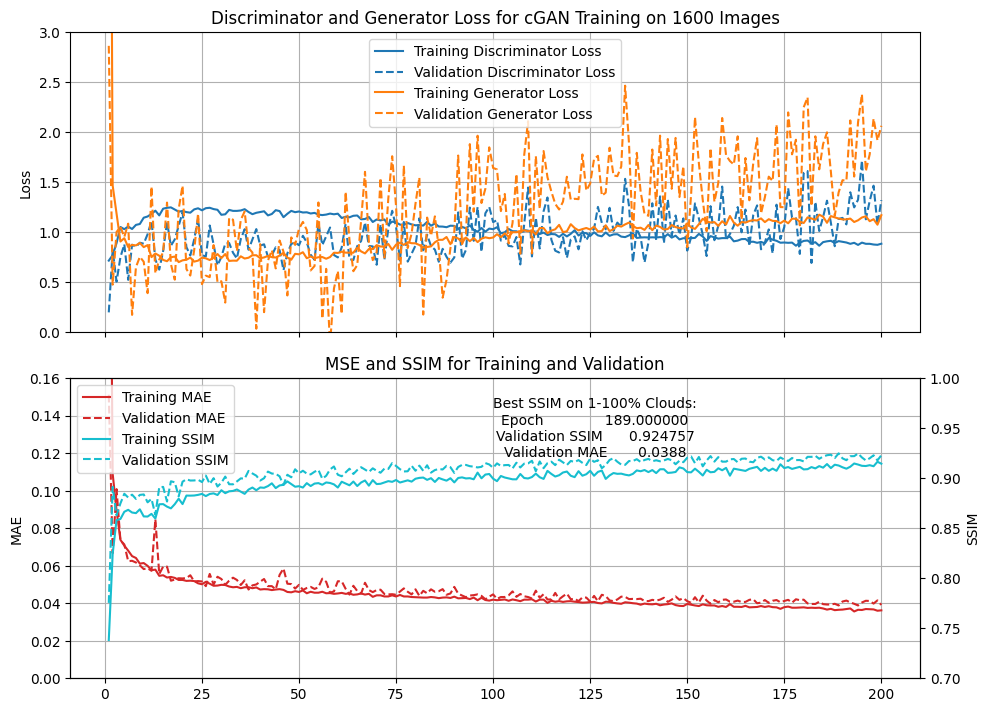

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# plotting D Loss and G Loss for both training and validation
ax1.plot(df["Epoch"], df["Training Discriminator Loss"], color="tab:blue", label="Training Discriminator Loss")
ax1.plot(df["Epoch"], df["Validation Discriminator Loss"], color="tab:blue", linestyle="--", label="Validation Discriminator Loss")
ax1.plot(df["Epoch"], df["Training Generator Loss"], color="tab:orange", label="Training Generator Loss")
ax1.plot(df["Epoch"], df["Validation Generator Loss"], color="tab:orange", linestyle="--", label="Validation Generator Loss")

ax1.set_ylabel("Loss")
ax1.set_ylim(0, 3.0)
ax1.set_title(f"Discriminator and Generator Loss for cGAN Training on {training_length} Images")
plt.suptitle("Best SSIM on 1-100% Clouds:\n" + str(df.iloc[df["Validation SSIM"].idxmax(), [0,-1,-2]])[:87], fontsize=10, y=0.4, x = 0.6)
ax1.legend()
ax1.grid(True)

# plotting MSE and SSIM on separate y-axes
ax2.plot(df["Epoch"], df["Training MAE"], color="tab:red", label="Training MAE")
ax2.plot(df["Epoch"], df["Validation MAE"], color="tab:red", linestyle="--", label="Validation MAE")
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 0.16)

ax2_2 = ax2.twinx()
ax2_2.plot(df["Epoch"], df["Training SSIM"], color="tab:cyan", label="Training SSIM")
ax2_2.plot(df["Epoch"], df["Validation SSIM"], linestyle="--", color="tab:cyan", label="Validation SSIM")
ax2_2.set_ylabel("SSIM")
ax2_2.set_ylim(0.7, 1.0)

# adding legend for the second y-axis
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_2.get_legend_handles_labels()
ax2_2.legend(lines + lines2, labels + labels2)

ax2.set_title("MAE and SSIM for Training and Validation")
ax2.grid(True)

# adjust layout to prevent clipping of labels
plt.tight_layout()
filename = root_dir / checkpoint_dir / 'training_graph.png'
plt.savefig(filename, dpi=300, bbox_inches='tight', format='png')